# FOOOF 

## 0.Loading packages, defining paths

In [1]:
# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import fooof

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
         

Import PyPerceive (has already been installed into the environment bssu)


In [2]:
import py_perceive

Load PyPerceive

In [3]:
from py_perceive.PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import py_perceive.PerceiveImport.methods.load_rawfile as load_rawfile
import py_perceive.PerceiveImport.methods.find_folders as find_folders
import py_perceive.PerceiveImport.methods.metadata_helpers as metaHelpers


importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'py_perceive.PerceiveImport.methods.metadata_helpers' from 'C:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\src\\py_perceive\\PerceiveImport\\methods\\metadata_helpers.py'>

Import Gunnar`s meet Toolbox

In [4]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet

Set Path back to BetaSenSightLongterm Repo

In [5]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm'

Load analysis functions

In [37]:
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd
import src.bssu.tfr.time_frequency_beta_erd_fooof_fit as tfr_fooof
import src.bssu.tfr.fooof_fit as fooof_fit

# bipolar Channel Analysis
import src.bssu.bipolar.PowerSpectra_withinChannels_Plot as PowerSpectraChannels
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(PowerSpectraChannels)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(tfr_fooof)
importlib.reload(fooof_fit)

<module 'src.bssu.tfr.fooof_fit' from 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\src\\bssu\\tfr\\fooof_fit.py'>

In [7]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Load one Json file with fooof results: filename "fooof_model_sub{subject}.json"

In [45]:
fooof_result = loadResults.load_fooof_json(subject="038")
fooof_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
038_Right_postop_03,038_Right,postop,03,0.075850,0.983955,2.951598,3.821656,8238.863591,3,"[11.262783125, 0.5340594119, 2.6816684184]","[None, None, None]","[30.4585274208, 0.7459954805, 8.9143887796]","[30.4585274208, 0.7459954805, 8.9143887796]","[None, None, None]"
038_Right_postop_13,038_Right,postop,13,0.074735,0.987267,4.889871,7.422845,24934786.850784,4,"[11.6242442557, 0.8423572452, 2.4332127113]","[19.5575308147, 0.3685572203, 5.0207275819]","[29.9225822225, 0.4240773507, 9.2589067496]","[29.9225822225, 0.4240773507, 9.2589067496]","[None, None, None]"
038_Right_postop_02,038_Right,postop,02,0.083622,0.981007,3.670156,5.091101,125325.152483,3,"[11.758557389, 0.6418093898, 2.2692949931]","[None, None, None]","[30.5667711191, 0.6042920284, 9.5907245111]","[30.5667711191, 0.6042920284, 9.5907245111]","[81.0, 0.1978789777, 20.0]"
038_Right_postop_12,038_Right,postop,12,0.075427,0.985048,3.874234,5.574776,413515.581135,3,"[11.3773183524, 0.6117007154, 2.575793912]","[None, None, None]","[32.8105214878, 0.4226541158, 4.991785612]","[32.8105214878, 0.4226541158, 4.991785612]","[None, None, None]"
038_Right_postop_01,038_Right,postop,01,0.089415,0.977367,3.850514,5.549750,881079.42914,4,"[11.9088949918, 0.9286514717, 2.122208365]","[18.0846737131, 0.4371999996, 4.4341419902]","[27.5477441159, 0.5718073054, 9.4737097832]","[27.5477441159, 0.5718073054, 9.4737097832]","[None, None, None]"


Write a group Dataframe concatenating all DF from each subject folder

In [9]:
fooof_group_result = writeGroupDF.write_fooof_group_json(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"]
)

In [13]:
fooof_group_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.062071,0.984228,1.789802,1.510125,wo_knee,4,"[None, None, None]","[None, None, None]","[29.1230769409, 0.5757473113, 6.9654712301]","[29.1230769409, 0.5757473113, 6.9654712301]","[None, None, None]"
1,017_Right,fu3m,13,0.086020,0.961885,1.494661,1.099469,wo_knee,4,"[None, None, None]","[None, None, None]","[29.2192804454, 0.9026002023, 2.9996984052]","[29.2192804454, 0.9026002023, 2.9996984052]","[None, None, None]"
2,017_Right,fu3m,02,0.082106,0.972390,1.754591,1.557219,wo_knee,4,"[None, None, None]","[None, None, None]","[29.52639043, 1.0032092798, 6.4720784861]","[29.52639043, 1.0032092798, 6.4720784861]","[None, None, None]"
3,017_Right,fu3m,12,0.094479,0.949418,3.197360,4.266728,69876.354037,3,"[None, None, None]","[None, None, None]","[29.0569975142, 0.7209673255, 4.0650624862]","[29.0569975142, 0.7209673255, 4.0650624862]","[82.7458266127, 0.3105218111, 4.4872275805]"
4,017_Right,fu3m,01,0.067213,0.976017,1.573552,1.132607,wo_knee,4,"[None, None, None]","[None, None, None]","[30.8852999093, 0.3194295567, 8.4306160856]","[30.8852999093, 0.3194295567, 8.4306160856]","[64.6314589389, 0.1981129703, 9.4143048634]"


## 1. fit a FOOOF model to find the highest Peak in freq bands: alpha, low beta, high beta, gamma

Use automatized code to fit FOOOF model on each channel of all patients

In [46]:
fooof_model = fooof_fit.fooof_fit_tfr(
    ["038"]
)

Load single power_spectra

In [8]:
# Import required code for visualizing example models
from fooof import FOOOF
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

# Import Bands object, to manage frequency band definitions
from fooof.bands import Bands

# Import utility functions that manage & manipulate FOOOF objects
from fooof.objs.utils import average_fg, combine_fooofs, compare_info

In [123]:
data_power_spectrum = mainAnalysis_class.MainClass(
        sub="025",
        hemisphere="Right",
        filter="unfiltered",
        result="PowerSpectrum",
        incl_session=["postop", "fu3m", "fu12m", "fu18m"],
        pickChannels=['03', '13', '02', '12', '01', '23', 
                        '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                        '1A2A', '1B2B', '1C2C'],
        normalization=["rawPsd"],
        feature=["frequency", "time_sectors", "rawPsd", "SEM_rawPsd"]
    )

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 5 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     1.3083, 74.6740, 1.7567                                      
                                                                                                  
                                       3 peaks were found:                                        
          

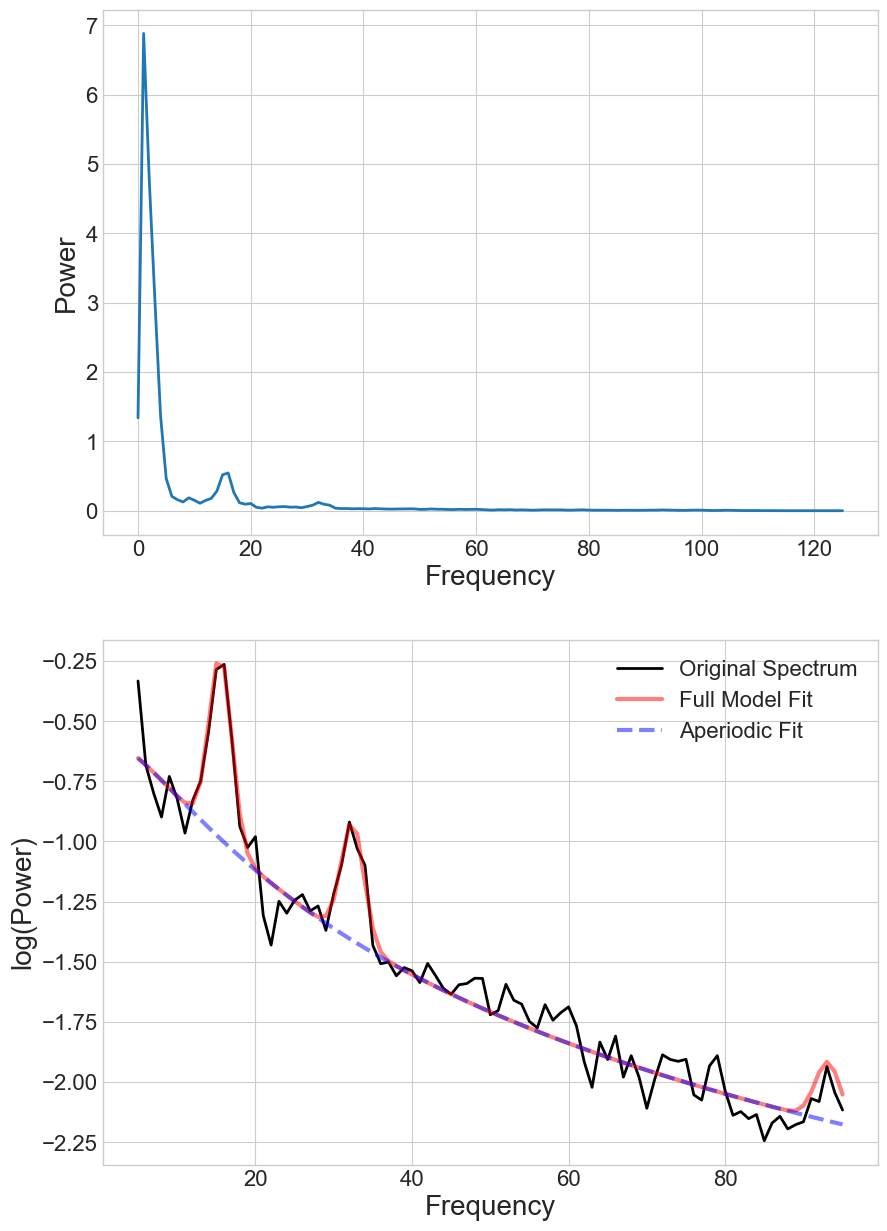

In [132]:
# save power spectrum and frequencies as arrays

power_spectrum = np.array(data_power_spectrum.postop.BIP_1B2B.rawPsd.data)
freqs = np.array(data_power_spectrum.postop.BIP_1B2B.frequency.data)
freq_range = [5, 95]


############ SET PLOT LAYOUT ############
fig, ax = plt.subplots(2,1, figsize=(10,15))

# Plot the unfiltered Power spectrum in first ax
plot_spectrum(freqs, power_spectrum, log_freqs=False, log_powers=False,
                  ax=ax[0])
# ax[0].plot(freqs, power_spectrum)


############ SET FOOOF MODEL ############
model = fooof.FOOOF(
        peak_width_limits=(2, 20.0),
        max_n_peaks=4,
        min_peak_height=0.0,
        peak_threshold=1.0,
        aperiodic_mode="knee", # fitting without knee component
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# Plot an example power spectrum, with a model fit in second ax
# model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'}, ax=ax[1])
model.plot(ax=ax[1])

# print the result in third ax
model.print_results()

############ SAVE APERIODIC PARAMETERS ############
# goodness of fit
err = model.get_params('error')
r_sq = model.r_squared_

# aperiodic components
exp = model.get_params('aperiodic_params', 'exponent')
offset = model.get_params('aperiodic_params', 'offset')


############ SAVE ALL PEAKS IN ALPHA; HIGH AND LOW BETA ############

number_peaks = model.n_peaks_

# select the highest Peak within alpha, low beta, high beta and gamma band
alpha_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(8.0, 12.0),
                    select_highest=True,
                    attribute="peak_params",
                )

low_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 20.0),
                    select_highest=True,
                    attribute="peak_params",
                )

high_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(21.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

gamma_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(60.0, 90.0),
                    select_highest=True,
                    attribute="peak_params",
                )


# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0] = CF center frequency of first Peak
# beta_peaks[1] = Power of first Peak
# beta_peaks[2] = BandWidth of first Peak

cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error=err, exponent=exp,
                      cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))


# Aperiodic parameters
print('Aperiodic parameters (offset, exponent): \n', model.aperiodic_params_, '\n')

# Peak parameters
print('Peak parameters: \n', model.peak_params_, '\n')

# Goodness of fit measures
print('Goodness of fit:')
print(' Error - ', model.error_)
print(' R^2   - ', model.r_squared_, '\n')

# Check how many peaks were fit
print('Number of fit peaks: \n', model.n_peaks_)


In [139]:
alpha_peak

array([nan, nan, nan])

In [93]:
# Extract a model parameter with `get_params`
err = model.get_params('error')

# Extract parameters, indicating sub-selections of parameters
exp = model.get_params('aperiodic_params', 'exponent')
cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error=err, exponent=exp,
                      cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))

With an error level of 0.07, FOOOF fit an exponent of 1.40 and peaks of 15.05 & 31.25 & 45.42 Hz.


In [40]:
# Richard's method
fit_model = tfr_fooof.fit_model(
    freqs=freqs,
    power_spectrum=power_spectrum,
    fit_knee=False, 
    ax=ax,
    )


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 125 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.9278, 2.4994                                          
                                                                                                  
                             

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 5 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.0961, 1.6207                                          
                                                                                                  
                                       4 peaks were found:                                        
          

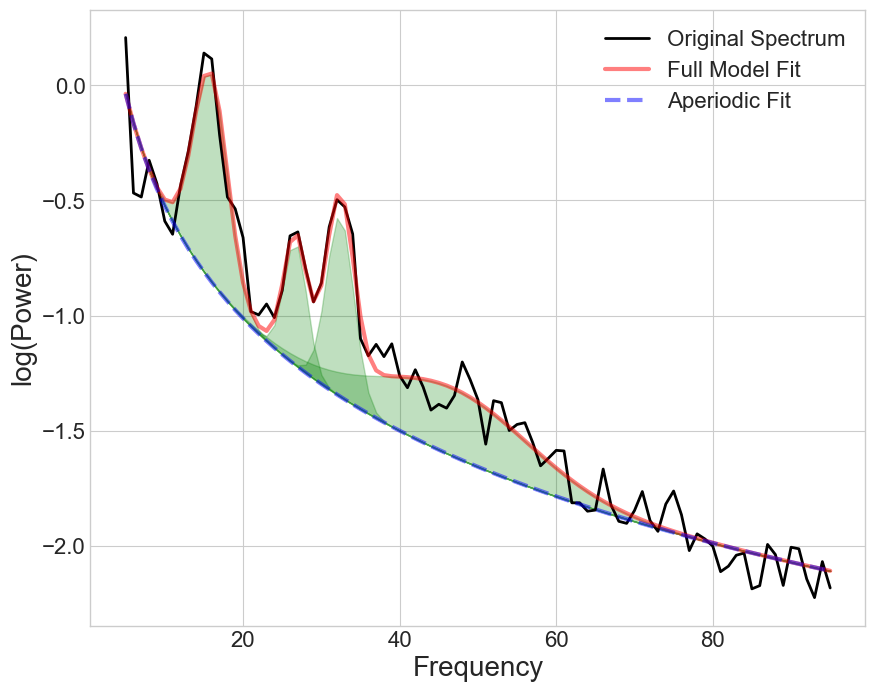

In [71]:
model = fooof.FOOOF(
        peak_width_limits=(2, 20.0),
        max_n_peaks=4,
        min_peak_height=0.0,
        peak_threshold=1.0,
        aperiodic_mode="fixed",
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
freq_range = [5, 95]
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# print the result
model.print_results()

# plot the Power Spectrum without shade
#model.report(freqs, power_spectrum, freq_range)

# Plot an example power spectrum, with a model fit
model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})

In [72]:
beta_peaks = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=False,
                    attribute="peak_params",
                )

# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0][0] = CF center frequency of first Peak
# beta_peaks[0][1] = Power of first Peak
# beta_peaks[0][2] = BandWidth of first Peak

In [73]:
peak_1 = beta_peaks[0]
peak_1

array([15.80561099,  0.90660617,  4.40086413])

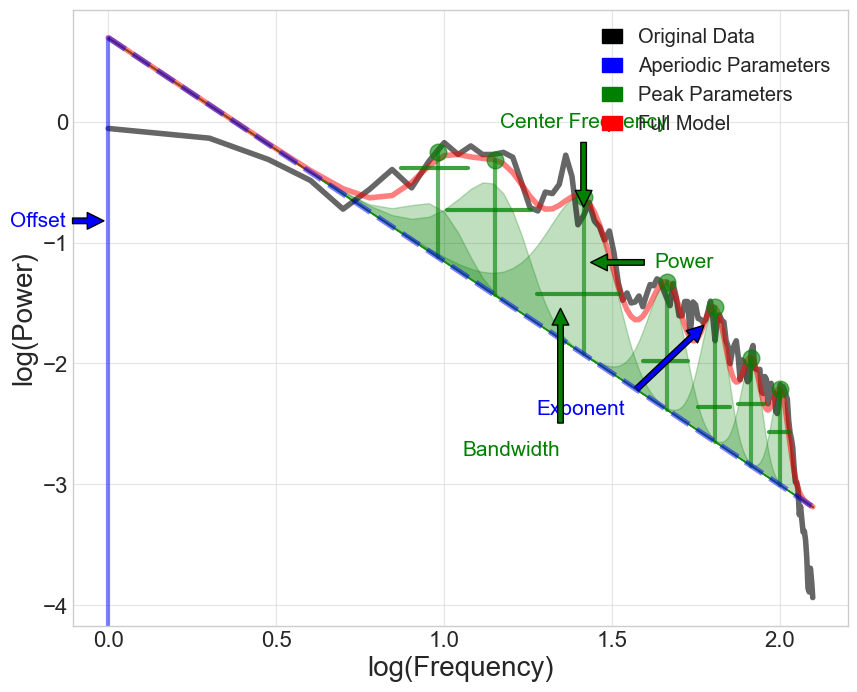

In [22]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1, plt_log=True)


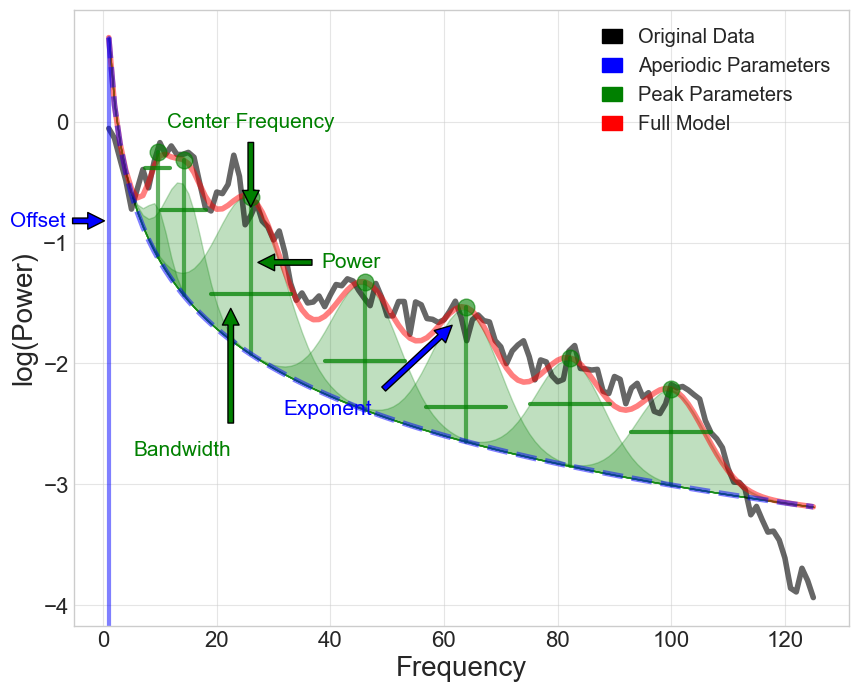

In [23]:
# plotted in log-log, here the aperiodic component is a straight line, hallmark of 1/f activity
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1)

## 2. Number of Peaks in frequency bands alpha, low beta, high beta, beta and gamma

In [8]:
fooof_group_result = loadResults.load_group_fooof_result()

How many channels with Peaks are found per session?

In [30]:
peaks_per_session = fooof_fit.fooof_peaks_per_session()

In [26]:
peaks_per_session

,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
postop_alpha,postop,alpha,270,57,0.211111
postop_low_beta,postop,low_beta,270,140,0.518519
postop_high_beta,postop,high_beta,270,186,0.688889
postop_beta,postop,beta,270,223,0.825926
postop_gamma,postop,gamma,270,191,0.707407
fu3m_alpha,fu3m,alpha,360,57,0.158333
fu3m_low_beta,fu3m,low_beta,360,200,0.555556
fu3m_high_beta,fu3m,high_beta,360,337,0.936111
fu3m_beta,fu3m,beta,360,354,0.983333
fu3m_gamma,fu3m,gamma,360,178,0.494444


In [12]:
freq_bands = ["alpha", "low_beta", "high_beta", "beta", "gamma"]
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

session_peak_dict = {}

for ses in sessions:

    # get the dataframes for each session seperately
    fooof_session = fooof_group_result.loc[(fooof_group_result["session"]==ses)]

    # get total number of recordings (per STN all 15 recordings included) per session 
    total_number_all_channels_session = len(fooof_session)

    for freq in freq_bands:
        freq_list = []

        for item in fooof_session[f"{freq}_peak_CF_power_bandWidth"].values:

            if None not in item:
                freq_list.append(item)

        freq_session_df = fooof_session.loc[fooof_session[f"{freq}_peak_CF_power_bandWidth"].isin(freq_list)]

        # count how many freq Peaks exist
        number_freq_peaks_session =  len(freq_session_df)

        # calculate % of channels with freq Peaks in this session
        percentage_freq_peaks_session = number_freq_peaks_session / total_number_all_channels_session

        session_peak_dict[f"{ses}_{freq}"] = [ses, freq, total_number_all_channels_session, number_freq_peaks_session, percentage_freq_peaks_session]
    
    
session_peak_df = pd.DataFrame(session_peak_dict)
session_peak_df.rename(index={
    0: "session",
    1: "frequency_band",
    2: "total_chans_number",
    3: "number_chans_with_peaks",
    4: "percentage_chans_with_peaks",
}, inplace=True)
session_peak_df = session_peak_df.transpose()



Plot the amount of Peaks in each frequency band per session

figure:  fooof_peaks_per_session.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures


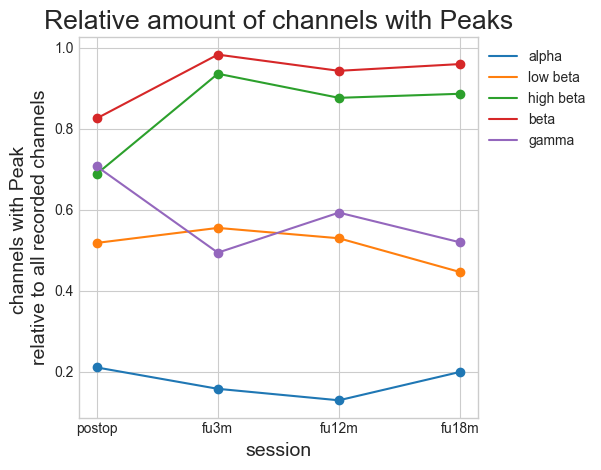

In [45]:
plot_peaks_per_session = fooof_fit.fooof_plot_peaks_per_session()

In [31]:
peaks_per_session = loadResults.load_fooof_peaks_per_session()

In [32]:
peaks_per_session

,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
postop_alpha,postop,alpha,270,57,0.211111
postop_low_beta,postop,low_beta,270,140,0.518519
postop_high_beta,postop,high_beta,270,186,0.688889
postop_beta,postop,beta,270,223,0.825926
postop_gamma,postop,gamma,270,191,0.707407
fu3m_alpha,fu3m,alpha,360,57,0.158333
fu3m_low_beta,fu3m,low_beta,360,200,0.555556
fu3m_high_beta,fu3m,high_beta,360,337,0.936111
fu3m_beta,fu3m,beta,360,354,0.983333
fu3m_gamma,fu3m,gamma,360,178,0.494444


In [33]:
alpha_peaks = peaks_per_session.loc[peaks_per_session.frequency_band == "alpha"]
low_beta_peaks = peaks_per_session.loc[peaks_per_session.frequency_band == "low_beta"]
high_beta_peaks = peaks_per_session.loc[peaks_per_session.frequency_band == "high_beta"]
beta_peaks = peaks_per_session.loc[peaks_per_session.frequency_band == "beta"]
gamma_peaks = peaks_per_session.loc[peaks_per_session.frequency_band == "gamma"]

In [34]:
beta_peaks

,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
postop_beta,postop,beta,270,223,0.825926
fu3m_beta,fu3m,beta,360,354,0.983333
fu12m_beta,fu12m,beta,300,283,0.943333
fu18m_beta,fu18m,beta,150,144,0.96


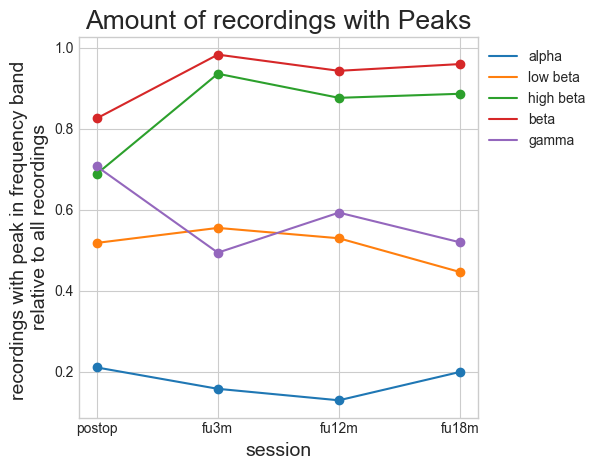

In [36]:
# plot line plot 

fig = plt.figure()

font = {"size": 14}

plt.plot(alpha_peaks.session, alpha_peaks.percentage_chans_with_peaks, label="alpha")
plt.plot(low_beta_peaks.session, low_beta_peaks.percentage_chans_with_peaks, label="low beta")
plt.plot(high_beta_peaks.session, high_beta_peaks.percentage_chans_with_peaks, label="high beta")
plt.plot(beta_peaks.session, beta_peaks.percentage_chans_with_peaks, label="beta")
plt.plot(gamma_peaks.session, gamma_peaks.percentage_chans_with_peaks, label="gamma")

plt.scatter(alpha_peaks.session, alpha_peaks.percentage_chans_with_peaks)
plt.scatter(low_beta_peaks.session, low_beta_peaks.percentage_chans_with_peaks)
plt.scatter(high_beta_peaks.session, high_beta_peaks.percentage_chans_with_peaks)
plt.scatter(beta_peaks.session, beta_peaks.percentage_chans_with_peaks)
plt.scatter(gamma_peaks.session, gamma_peaks.percentage_chans_with_peaks)

plt.title("Amount of recordings with Peaks", fontdict={"size": 19})

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.xlabel("session", fontdict=font)
plt.ylabel("recordings with peak in frequency band \nrelative to all recordings", fontdict=font)
plt.tight_layout()


## 3. Calculate the ratio of low beta and high beta Peaks as highest Peak in beta band 

First calculate the ratio of total low beta vs high beta Peaks (independent of which Peak is higher)

figure:  fooof_low_vs_high_beta_peaks_per_session.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures


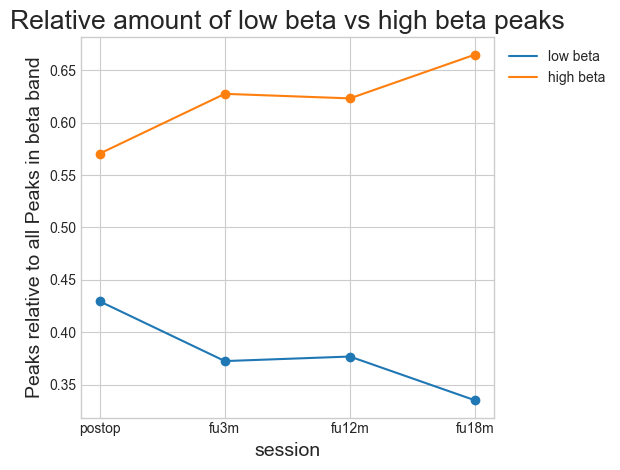

In [15]:
peaks_per_session = fooof_fit.fooof_low_vs_high_beta_ratio()

In [16]:
peaks_per_session

,session,beta_peaks,low_beta_peaks,high_beta_peaks,relative_low_beta,relative_high_beta
postop,postop,326,140,186,0.429448,0.570552
fu3m,fu3m,537,200,337,0.372439,0.627561
fu12m,fu12m,422,159,263,0.376777,0.623223
fu18m,fu18m,200,67,133,0.335,0.665


In [8]:
peaks_per_session = loadResults.load_fooof_peaks_per_session()

In [9]:
peaks_per_session

,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
postop_alpha,postop,alpha,270,57,0.211111
postop_low_beta,postop,low_beta,270,140,0.518519
postop_high_beta,postop,high_beta,270,186,0.688889
postop_beta,postop,beta,270,223,0.825926
postop_gamma,postop,gamma,270,191,0.707407
fu3m_alpha,fu3m,alpha,360,57,0.158333
fu3m_low_beta,fu3m,low_beta,360,200,0.555556
fu3m_high_beta,fu3m,high_beta,360,337,0.936111
fu3m_beta,fu3m,beta,360,354,0.983333
fu3m_gamma,fu3m,gamma,360,178,0.494444


In [10]:
session_df = peaks_per_session.loc[peaks_per_session.session=="postop"]
session_df

,session,frequency_band,total_chans_number,number_chans_with_peaks,percentage_chans_with_peaks
postop_alpha,postop,alpha,270,57,0.211111
postop_low_beta,postop,low_beta,270,140,0.518519
postop_high_beta,postop,high_beta,270,186,0.688889
postop_beta,postop,beta,270,223,0.825926
postop_gamma,postop,gamma,270,191,0.707407


In [11]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

rel_low_vs_high_beta = {}

for ses in sessions:

    session_df = peaks_per_session.loc[peaks_per_session.session==ses]

    # beta_peaks = session_df.loc[session_df.frequency_band=="beta"]
    # beta_peaks = beta_peaks.number_chans_with_peaks.values
    # beta_peaks = beta_peaks[0]

    low_beta_peaks = session_df.loc[session_df.frequency_band=="low_beta"]
    low_beta_peaks = low_beta_peaks.number_chans_with_peaks.values
    low_beta_peaks = low_beta_peaks[0]

    high_beta_peaks = session_df.loc[session_df.frequency_band=="high_beta"]
    high_beta_peaks = high_beta_peaks.number_chans_with_peaks.values
    high_beta_peaks = high_beta_peaks[0]

    beta_peaks = low_beta_peaks + high_beta_peaks

    relative_low_beta = low_beta_peaks / beta_peaks
    relative_high_beta = high_beta_peaks / beta_peaks

    rel_low_vs_high_beta[f"{ses}"] = [ses, beta_peaks, low_beta_peaks, high_beta_peaks, relative_low_beta, relative_high_beta]


# save the results in a dataframe
session_low_vs_high_peak_df = pd.DataFrame(rel_low_vs_high_beta)
session_low_vs_high_peak_df.rename(index={
    0: "session",
    1: "beta_peaks",
    2: "low_beta_peaks",
    3: "high_beta_peaks",
    4: "relative_low_beta",
    5: "relative_high_beta"
}, inplace=True)
session_low_vs_high_peak_df = session_low_vs_high_peak_df.transpose()



In [12]:
session_low_vs_high_peak_df

,session,beta_peaks,low_beta_peaks,high_beta_peaks,relative_low_beta,relative_high_beta
postop,postop,326,140,186,0.429448,0.570552
fu3m,fu3m,537,200,337,0.372439,0.627561
fu12m,fu12m,422,159,263,0.376777,0.623223
fu18m,fu18m,200,67,133,0.335,0.665


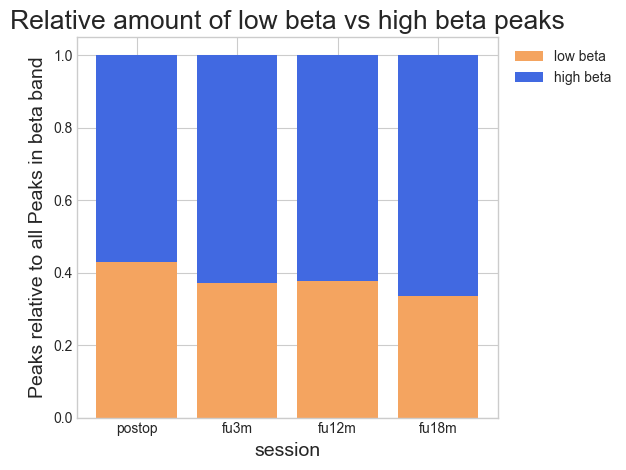

In [43]:
fig = plt.figure()

font = {"size": 14}

plt.bar(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta, label="low beta", color="sandybrown")
plt.bar(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta, label="high beta", bottom=session_low_vs_high_peak_df.relative_low_beta, color="royalblue")

# plt.plt(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta, label="low beta")
# plt.plt(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta, label="high beta")

# plt.scatter(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta,)
# plt.scatter(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta)

plt.title("Relative amount of low beta vs high beta peaks", fontdict={"size": 19})

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.xlabel("session", fontdict=font)
plt.ylabel("Peaks relative to all Peaks in beta band", fontdict=font)
fig.tight_layout()

## 4. Center Frequency of highest Peak in beta band (13-35 Hz)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 3.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-13 U_stat=2.540e+04
3.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.243e-02 U_stat=5.398e+04
12.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.395e-02 U_stat=1.805e+04
0.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.366e-08 U_stat=2.228e+04
3.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.112e-01 U_stat=2.453e+04
0.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.029e-09 U_stat=1.025e+04
figure:  fooof_highest_beta_peak_center_freq.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures
file:  fooof_center_freq_session_description_highest_beta_peak.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


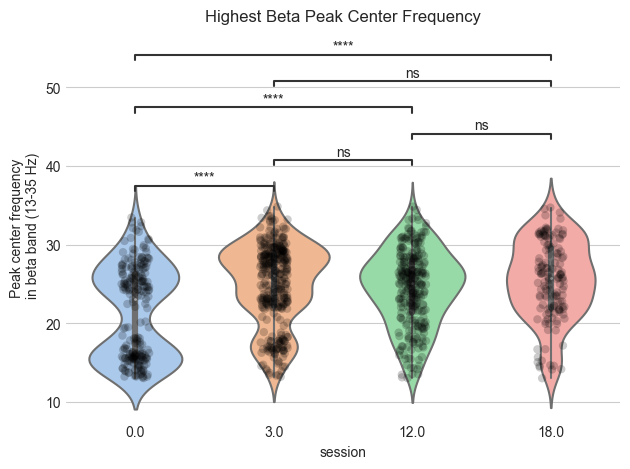

In [38]:
center_freq_beta = fooof_fit.fooof_highest_beta_peak_cf()

In [26]:
center_freq_beta["description_results"]

,number_observations,min_and_max,mean,variance,skewness,kurtosis
0.0_months_postop,223,"(13.0182812573, 33.4421995766)",21.402832,33.696318,0.082395,-1.43541
3.0_months_postop,354,"(13.1798526772, 34.8422643731)",24.909206,25.981049,-0.527289,-0.679124
12.0_months_postop,283,"(13.0159880365, 34.8330854639)",24.443643,22.880766,-0.330202,-0.504257
18.0_months_postop,144,"(13.0, 34.7135510742)",25.412741,25.477248,-0.416246,-0.392307


In [27]:
fooof_result = loadResults.load_group_fooof_result()
fooof_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.062071,0.984228,1.789802,1.510125,wo_knee,4,"[None, None, None]","[None, None, None]","[29.1230769409, 0.5757473113, 6.9654712301]","[29.1230769409, 0.5757473113, 6.9654712301]","[None, None, None]"
1,017_Right,fu3m,13,0.086020,0.961885,1.494661,1.099469,wo_knee,4,"[None, None, None]","[None, None, None]","[29.2192804454, 0.9026002023, 2.9996984052]","[29.2192804454, 0.9026002023, 2.9996984052]","[None, None, None]"
2,017_Right,fu3m,02,0.082106,0.972390,1.754591,1.557219,wo_knee,4,"[None, None, None]","[None, None, None]","[29.52639043, 1.0032092798, 6.4720784861]","[29.52639043, 1.0032092798, 6.4720784861]","[None, None, None]"
3,017_Right,fu3m,12,0.094479,0.949418,3.197360,4.266728,69876.354037,3,"[None, None, None]","[None, None, None]","[29.0569975142, 0.7209673255, 4.0650624862]","[29.0569975142, 0.7209673255, 4.0650624862]","[82.7458266127, 0.3105218111, 4.4872275805]"
4,017_Right,fu3m,01,0.067213,0.976017,1.573552,1.132607,wo_knee,4,"[None, None, None]","[None, None, None]","[30.8852999093, 0.3194295567, 8.4306160856]","[30.8852999093, 0.3194295567, 8.4306160856]","[64.6314589389, 0.1981129703, 9.4143048634]"


In [28]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]
beta_peak_parameters = {}

for ses in sessions:

    if ses == "postop":
        numeric_session = 0
    
    elif ses == "fu3m":
        numeric_session = 3
    
    elif ses == "fu12m":
        numeric_session = 12
    
    elif ses == "fu18m":
        numeric_session = 18

    session_df = fooof_result.loc[fooof_result.session==ses]
    beta_peaks_wo_None = []

    # only get the rows with Peaks (drop all rows with None)
    for item in session_df.beta_peak_CF_power_bandWidth.values:
    
        if None not in item:
            beta_peaks_wo_None.append(item)

    beta_peak_ses_df = session_df.loc[session_df["beta_peak_CF_power_bandWidth"].isin(beta_peaks_wo_None)]

    # get only the center frequency from the column beta_peak_CF_power_bandWidth
    for i, item in enumerate(beta_peak_ses_df.beta_peak_CF_power_bandWidth.values):
        # item is a list of center frequency, power, band width of highest Peak in beta band

        beta_cf = item[0]
        beta_power = item[1]
        beta_band_width = item[2]

        beta_peak_parameters[f"{ses}_{i}"] = [numeric_session, beta_cf, beta_power, beta_band_width]


# save the results in a dataframe
beta_peak_parameters_df = pd.DataFrame(beta_peak_parameters)
beta_peak_parameters_df.rename(index={
    0: "session",
    1: "beta_cf",
    2: "beta_power",
    3: "beta_band_width",
}, inplace=True)
beta_peak_parameters_df = beta_peak_parameters_df.transpose()


In [29]:
# only get the rows with Peaks (drop all rows with None)
beta_peaks_wo_None=[]
for item in fooof_result.beta_peak_CF_power_bandWidth.values:

    if None not in item:
        beta_peaks_wo_None.append(item)

beta_peak_wo_none_df = fooof_result.loc[fooof_result["beta_peak_CF_power_bandWidth"].isin(beta_peaks_wo_None)]

In [30]:
beta_peak_wo_none_df.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.062071,0.984228,1.789802,1.510125,wo_knee,4,"[None, None, None]","[None, None, None]","[29.1230769409, 0.5757473113, 6.9654712301]","[29.1230769409, 0.5757473113, 6.9654712301]","[None, None, None]"
1,017_Right,fu3m,13,0.086020,0.961885,1.494661,1.099469,wo_knee,4,"[None, None, None]","[None, None, None]","[29.2192804454, 0.9026002023, 2.9996984052]","[29.2192804454, 0.9026002023, 2.9996984052]","[None, None, None]"
2,017_Right,fu3m,02,0.082106,0.972390,1.754591,1.557219,wo_knee,4,"[None, None, None]","[None, None, None]","[29.52639043, 1.0032092798, 6.4720784861]","[29.52639043, 1.0032092798, 6.4720784861]","[None, None, None]"
3,017_Right,fu3m,12,0.094479,0.949418,3.197360,4.266728,69876.354037,3,"[None, None, None]","[None, None, None]","[29.0569975142, 0.7209673255, 4.0650624862]","[29.0569975142, 0.7209673255, 4.0650624862]","[82.7458266127, 0.3105218111, 4.4872275805]"
4,017_Right,fu3m,01,0.067213,0.976017,1.573552,1.132607,wo_knee,4,"[None, None, None]","[None, None, None]","[30.8852999093, 0.3194295567, 8.4306160856]","[30.8852999093, 0.3194295567, 8.4306160856]","[64.6314589389, 0.1981129703, 9.4143048634]"


In [90]:
# merge dataframe with all columns + columns from beta_peak_parameters_df


In [116]:
beta_peak_parameters_df.head()

,session,beta_cf,beta_power,beta_band_width
postop_0,0.0,15.439420,0.480978,2.265218
postop_1,0.0,14.284981,0.642110,3.707680
postop_2,0.0,22.669247,0.141364,12.190925
postop_3,0.0,23.033545,0.546670,8.080994
postop_4,0.0,17.387427,0.261385,2.263232


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 3.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-13 U_stat=2.540e+04
3.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.243e-02 U_stat=5.398e+04
12.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.395e-02 U_stat=1.805e+04
0.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.366e-08 U_stat=2.228e+04
3.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.112e-01 U_stat=2.453e+04
0.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.029e-09 U_stat=1.025e+04


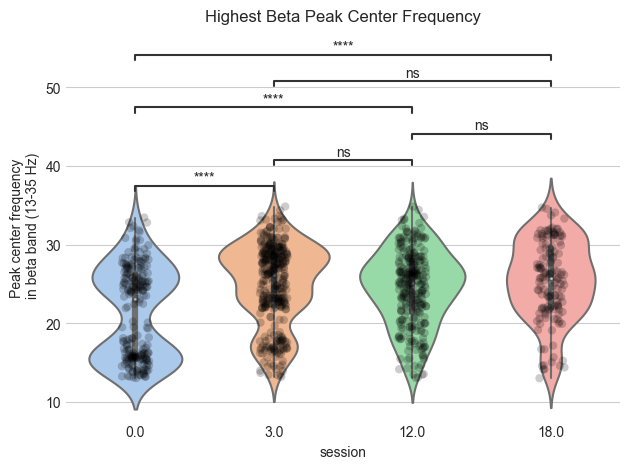

In [36]:
fig=plt.figure()
ax = fig.add_subplot()

sns.violinplot(data=beta_peak_parameters_df, x="session", y="beta_cf", palette="pastel", inner="box", ax=ax)

# statistical test: doesn't work if groups have different sample size
num_sessions = [0.0, 3.0, 12.0, 18.0]
pairs = list(combinations(num_sessions, 2))

annotator = Annotator(ax, pairs, data=beta_peak_parameters_df, x='session', y="beta_cf")
annotator.configure(test='Mann-Whitney', text_format='star') # or t-test_ind ??
annotator.apply_and_annotate()

sns.stripplot(
    data=beta_peak_parameters_df,
    x="session",
    y="beta_cf",
    ax=ax,
    size=6,
    color="black",
    alpha=0.2, # Transparency of dots
)

sns.despine(left=True, bottom=True) # get rid of figure frame

plt.title("Highest Beta Peak Center Frequency")
plt.ylabel("Peak center frequency \nin beta band (13-35 Hz)")
plt.xlabel("session")

fig.tight_layout()



In [133]:
# describe each group
num_sessions = [0.0, 3.0, 12.0, 18.0]
group_description = {}

for ses in num_sessions:

    group = beta_peak_parameters_df.loc[beta_peak_parameters_df.session==ses]
    group = np.array(group.beta_cf.values)

    description = scipy.stats.describe(group)

    group_description[f"{ses}_months_postop"] = description


description_results = pd.DataFrame(group_description)
description_results.rename(index={0: "number_observations", 1: "min_and_max", 2: "mean", 3: "variance", 4: "skewness", 5: "kurtosis"}, inplace=True)
description_results = description_results.transpose()

In [134]:
description_results

,number_observations,min_and_max,mean,variance,skewness,kurtosis
0.0_months_postop,223,"(13.0182812573, 33.4421995766)",21.402832,33.696318,0.082395,-1.43541
3.0_months_postop,354,"(13.1798526772, 34.8422643731)",24.909206,25.981049,-0.527289,-0.679124
12.0_months_postop,283,"(13.0159880365, 34.8330854639)",24.443643,22.880766,-0.330202,-0.504257
18.0_months_postop,144,"(13.0, 34.7135510742)",25.412741,25.477248,-0.416246,-0.392307
